In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/rl_robust_owc')

In [2]:
%matplotlib notebook
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt

import gym
from stable_baselines3.a2c import A2C, MlpPolicy
# from utils.subproc_vec_env import SubprocVecEnv
# from utils.multiprocessing_env import SubprocVecEnv
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList
from utils.custom_eval_callback import CustomEvalCallback
from typing import Callable
from utils.plot_functions import plot_learning
from utils.env_wrappers import StateCoarse

from model.ressim import Grid
from ressim_env import ResSimEnv_v0, ResSimEnv_v1, ResSimEnv_v3

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case='case_1_a2c'

In [4]:
os.makedirs('./data', exist_ok=True)
os.makedirs('./data/'+case, exist_ok=True)

In [5]:
with open('../envs_params/env_data/env_train.pkl', 'rb') as input:
    env_train = pickle.load(input)
    
with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
    env_eval = pickle.load(input)

In [6]:
# env wrapper parameters
x_coords, y_coords = env_train.p_x, env_train.p_y

def env_wrappers(env, x_coords, y_coords):
    env = StateCoarse(env, x_coords, y_coords, include_well_pr=True)
    return env

In [7]:
def make_env(env, rank: int, seed: int = 0) -> Callable:
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :return: (Callable)
    """
    def _init() -> gym.Env:
        env_ = env
        env_.seed(seed + rank)
        return env_
    return _init

seed 1
Box(-100000.0, 100000.0, (93,), float64)
seed 1: model definition ..
Using cuda device
seed 1: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:106: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f316a3762b0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f316a376208>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:106: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f316a3762b0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f316a376240>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=12800, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=12800, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=19200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=25600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=25600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_reward=0.62 +/- 0.00
Episod

Eval num_timesteps=166400, episode_reward=0.67 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=166400, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.67 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.67 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=179200, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=185600, episode_reward=0.67 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=185600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=192000, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=192000, episode_reward=0.68 +/-

<IPython.core.display.Javascript object>


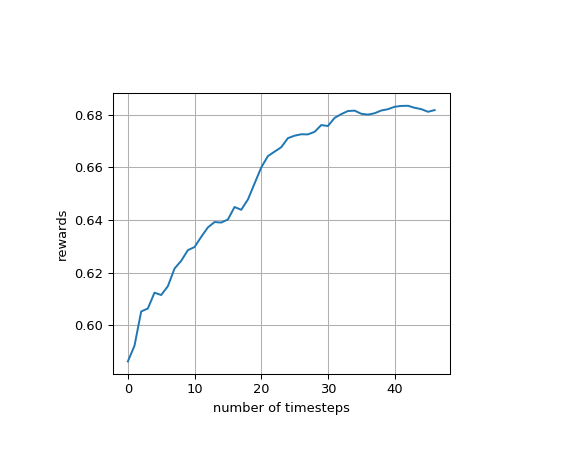

<IPython.core.display.Javascript object>


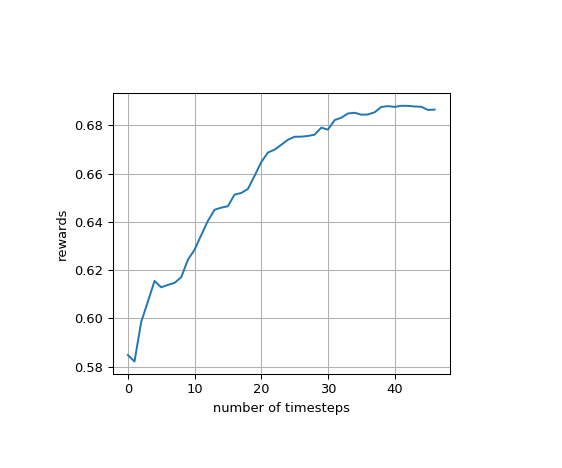

seed 2
Box(-100000.0, 100000.0, (93,), float64)
seed 2: model definition ..
Using cuda device
seed 2: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:106: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f31600394a8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f3160041ba8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:106: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f31600394a8> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f31600407f0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=6400, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=12800, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=12800, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=19200, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=19200, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=25600, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=25600, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=32000, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=32000, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 5       

Eval num_timesteps=166400, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=166400, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=179200, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=179200, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=185600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=185600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 5        |
|    mean_reward        | 0.6

<IPython.core.display.Javascript object>


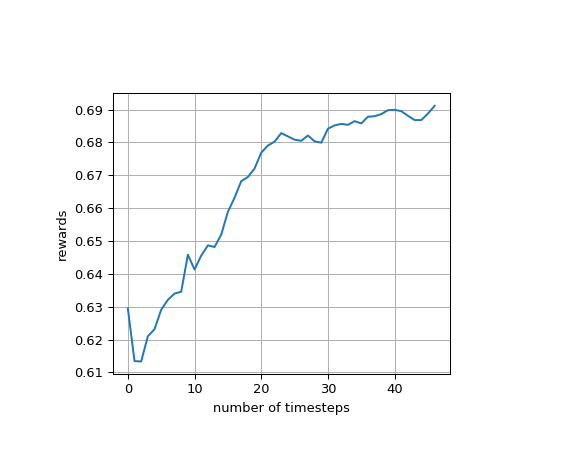

<IPython.core.display.Javascript object>


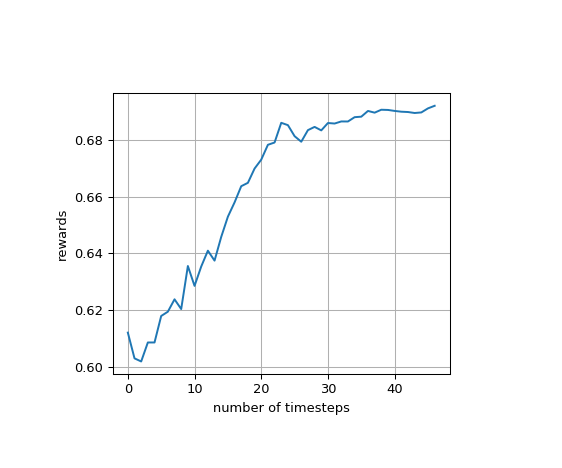

seed 3
Box(-100000.0, 100000.0, (93,), float64)
seed 3: model definition ..
Using cuda device
seed 3: learning ..


/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:106: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f30b81ed160> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f31040d6f98>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/utils/custom_eval_callback.py:106: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f30b81ed160> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f31040d6b70>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


Eval num_timesteps=6400, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=12800, episode_reward=0.62 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=12800, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=19200, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=25600, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=25600, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_rewar

Eval num_timesteps=166400, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=166400, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=172800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=172800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=185600, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=185600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=192000, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length   

<IPython.core.display.Javascript object>


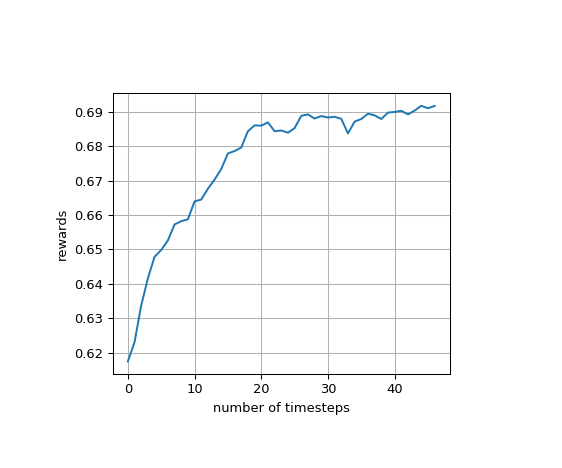

<IPython.core.display.Javascript object>


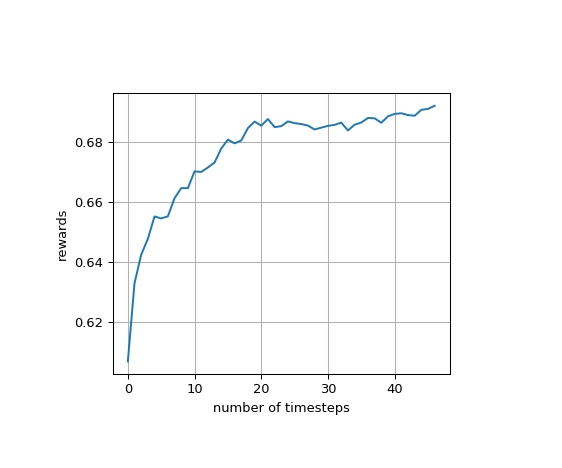

In [8]:
for seed in range(1,4):
    if True:
        print(f'seed {seed}')
        log_dir = './data/'+case+'/seed_'+str(seed)
        os.makedirs(log_dir, exist_ok=True)
        num_cpu = 64
        env_train.seed(seed)
        env_eval.seed(seed)
        env_train_ = env_wrappers(env_train, x_coords, y_coords)
        env_eval_ = env_wrappers(env_eval, x_coords, y_coords)
        train_callback = CustomEvalCallback(env_train_, 
                                            best_model_save_path=None, 
                                            n_eval_episodes=1,
                                            log_path=str(log_dir)+'/results_train', 
                                            eval_freq=100)
        callback_list = [train_callback]
        eval_callback = CustomEvalCallback(env_eval_, 
                                           best_model_save_path=str(log_dir)+'/best_model_eval', 
                                           n_eval_episodes=1,
                                           log_path=str(log_dir)+'/results_eval', 
                                           eval_freq=100)
        callback_list.append(eval_callback)
        callback = CallbackList(callback_list)
        env = SubprocVecEnv([make_env(env_train_, i, seed) for i in range(num_cpu)])
        print(env.observation_space)
#     env = VecMonitor(env, filename=log_dir)
        print(f'seed {seed}: model definition ..')
        model = A2C(policy=MlpPolicy,
                    env=env,
                    learning_rate = 2e-4,
                    n_steps = 50,
                    gamma = 0.99,
                    gae_lambda = 0.95,
                    ent_coef = 0.005,
                    vf_coef = 0.6,
                    max_grad_norm = 0.5,
                    use_sde= False,
                    create_eval_env= False,
                    policy_kwargs = dict(net_arch=[150,100,80], log_std_init=-2.9),
                    verbose = 1,
                    seed = seed,
                    device = "auto")
        print(f'seed {seed}: learning ..')
        model.learn(total_timesteps=300000, callback=callback, log_interval=10)
        model.save(log_dir+'/A2C')
        del model
        fig = plot_learning(log_dir, case='train')
        fig.savefig(log_dir+'/learn_train.png')
        fig = plot_learning(log_dir, case='eval')
        fig.savefig(log_dir+'/learn_eval.png')

In [9]:
#         fig = plot_learning(log_dir, case='train')
#         fig.savefig(log_dir+'/learn_train.png')
#         fig = plot_learning(log_dir, case='eval')
#         fig.savefig(log_dir+'/learn_eval.png')